### Import libraries

In [16]:
import pandas as pd
from constants import target_col as target_name, index_col as index_name
from utilities import model_and_evaluate

### Configure defaults

In [2]:
index_col = index_name.lower()
target_col = [target_name]
dt_algo = 'Decision Tree'
rf_algo = 'Random Forest'

### Read data

In [3]:
train_std = pd.read_csv('./outputs/std/train.csv').set_index(index_col)
test_std = pd.read_csv('./outputs/std/test.csv').set_index(index_col)

train_mm = pd.read_csv('./outputs/min_max/train.csv').set_index(index_col)
test_mm = pd.read_csv('./outputs/min_max/test.csv').set_index(index_col)

### Data check

In [4]:
train_std.head()

,attrition_flag,gender_F,gender_M,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
clientnum,,,,,,,,,,,,,,,,
713796033,1,0,1,0.085971,-0.271041,0.761682,1.409797,0.661411,0.498335,-0.427523,-1.423834,-0.541924,-0.736571,-1.228105,-0.892927,-0.997729
771204108,0,1,0,-1.290336,-0.271041,-1.623249,-0.527633,-1.331855,-2.214038,-0.734047,0.023954,0.489055,-0.149068,0.092368,0.025604,1.201739
721399833,0,1,0,-0.414504,-0.271041,-0.242499,-0.527633,-1.331855,0.498335,-0.725459,-0.186031,0.543798,0.098177,0.901690,0.497510,0.811452
778601733,1,1,0,1.086921,0.499385,1.389296,0.763987,1.658044,0.498335,-0.653342,0.650224,-0.208908,-0.598231,-1.313297,0.324759,1.296575
714047733,0,1,0,0.836684,0.499385,1.138250,-1.173443,-0.335222,-1.309914,-0.405063,1.178255,-0.190661,0.899960,0.859094,-0.454728,0.567066


In [5]:
train_mm.head()

,attrition_flag,gender_F,gender_M,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
clientnum,,,,,,,,,,,,,,,,
713796033,1,0,1,0.446809,0.4,0.674419,1.0,0.500000,0.500000,0.099756,0.000000,0.188696,0.076306,0.201550,0.140017,0.000000
771204108,0,1,0,0.212766,0.4,0.232558,0.4,0.166667,0.000000,0.015591,0.468415,0.255225,0.187479,0.441860,0.201064,0.603604
721399833,0,1,0,0.361702,0.4,0.488372,0.4,0.166667,0.500000,0.017949,0.400477,0.258758,0.234265,0.589147,0.232428,0.496496
778601733,1,1,0,0.617021,0.6,0.790698,0.8,0.666667,0.500000,0.037751,0.671037,0.210185,0.102484,0.186047,0.220947,0.629630
714047733,0,1,0,0.574468,0.6,0.744186,0.2,0.333333,0.166667,0.105923,0.841875,0.211363,0.385986,0.581395,0.169140,0.429429


In [6]:
print('Standardized train set shape:', train_std.shape, 'test set shape:', test_std.shape)
print('MinMax scaled train set shape:', train_mm.shape, 'test set shape:', test_mm.shape)

Standardized train set shape: (8607, 16) test set shape: (1520, 16)
MinMax scaled train set shape: (8607, 16) test set shape: (1520, 16)


In [7]:
print('NA count by column')

NA_df = pd.DataFrame()
NA_df['train_standardized'] = train_std.isna().sum()
NA_df['test_standardized'] = test_std.isna().sum()
NA_df['train_minmax'] = train_mm.isna().sum()
NA_df['test_minmax'] = test_mm.isna().sum()
NA_df.T

NA count by column


,attrition_flag,gender_F,gender_M,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
train_standardized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test_standardized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
train_minmax,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test_minmax,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Separate target

In [17]:
X_train_std, y_train_std = train_std.drop(columns=target_col), train_std[target_col]
X_test_std, y_test_std = test_std.drop(columns=target_col), test_std[target_col]

X_train_mm, y_train_mm = train_mm.drop(columns=target_col), train_mm[target_col]
X_test_mm, y_test_mm = test_mm.drop(columns=target_col), test_mm[target_col]

Decision Tree with standardized input

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1276
           1       0.80      0.85      0.82       244

    accuracy                           0.94      1520
   macro avg       0.88      0.90      0.89      1520
weighted avg       0.94      0.94      0.94      1520
 



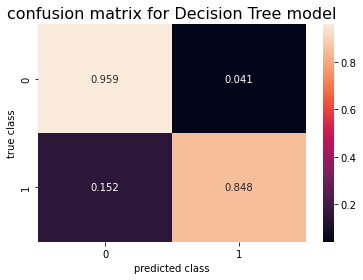

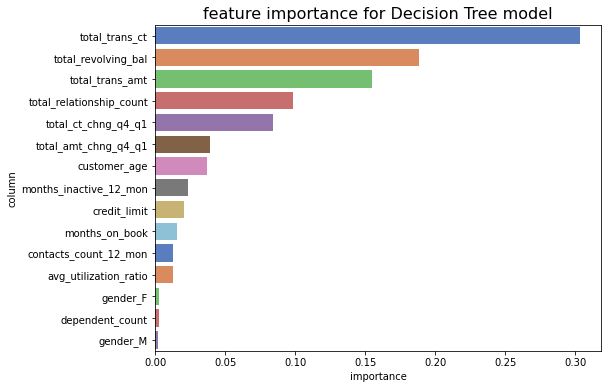

In [18]:
print('{} with standardized input\n'.format(dt_algo))
dt_std = model_and_evaluate(X_train_std, y_train_std, X_test_std, y_test_std, dt_algo)

Decision Tree with minmax scaled input
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1276
           1       0.80      0.84      0.82       244

    accuracy                           0.94      1520
   macro avg       0.88      0.90      0.89      1520
weighted avg       0.94      0.94      0.94      1520
 



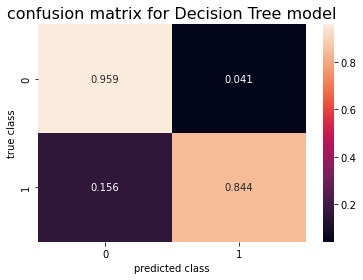

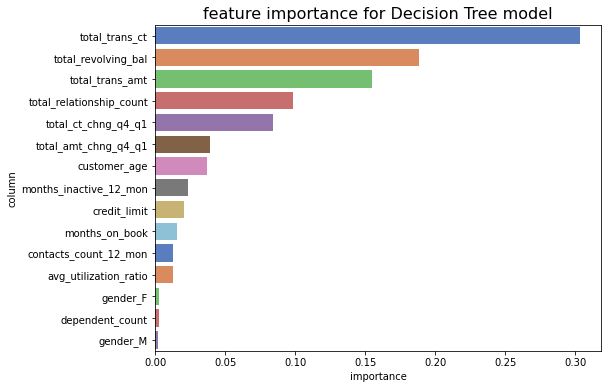

In [19]:
print('{} with minmax scaled input'.format(dt_algo))
dt_mm = model_and_evaluate(X_train_mm, y_train_mm, X_test_mm, y_test_mm, dt_algo)

Random Forest with standardized input



/Users/apple/Desktop/hello-hello/utilities/modeling.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model(random_state=seed).fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1276
           1       0.91      0.83      0.87       244

    accuracy                           0.96      1520
   macro avg       0.94      0.91      0.92      1520
weighted avg       0.96      0.96      0.96      1520
 



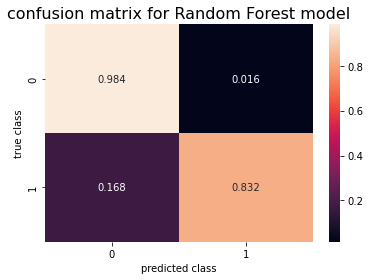

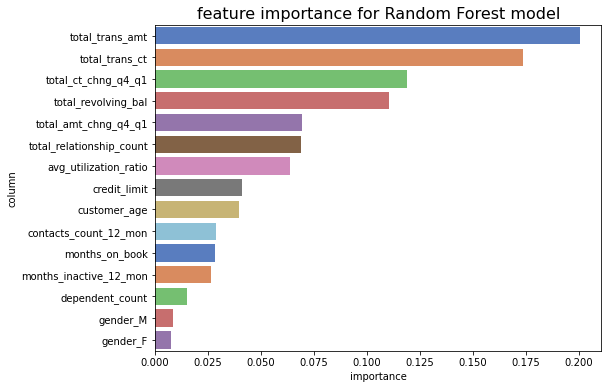

In [21]:
print('{} with standardized input\n'.format(rf_algo))
dt_std = model_and_evaluate(X_train_std, y_train_std, X_test_std, y_test_std, rf_algo)

In [11]:
# print('\nStandardized train set')
# print(train_std.isna().sum())
# print('\nStandardized test set')
# print(test_std.isna().sum())
# print('\nMinMax scaled train set')
# print(train_mm.isna().sum())
# print('\nMinMax scaled test set')
# print(test_mm.isna().sum())

# dt_std = DecisionTreeClassifier().fit(X_train_std, y_train_std)
# dt_std_pred = dt_std.predict(X_test_std)

# print_evaluation_summary(y_test_std, dt_std_pred, dt_algo)

# plot_feature_importance(dt_std.feature_importances_, dt_algo, X_train_std.columns)


# dt_mm = DecisionTreeClassifier().fit(X_train_mm, y_train_mm)
# dt_mm_pred = dt_mm.predict(X_test_mm)

# print_evaluation_summary(y_test_mm, dt_mm_pred, dt_algo)

# plot_feature_importance(dt_mm.feature_importances_, dt_algo, X_train_mm.columns)

# type(X_test_mm)
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from utilities import print_evaluation_summary, plot_feature_importance